In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# read csv
file = "crypto_data.csv"
df = pd.read_csv(file)

In [3]:
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


## Data Preperation 

In [15]:
#Discard all cryptocurrencies that are not being traded.
#Aka filter for currencies that are currently being traded. 
trading = df.drop(df[df['IsTrading'] == False].index)
trading

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [16]:
#Once you have done this, drop the IsTrading column from the dataframe.
current = trading.drop(['IsTrading'], axis=1)
current

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [17]:
#Remove all rows that have at least one null value.
no_nulls =  current.dropna()
no_nulls

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [18]:
no_nulls.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [19]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
mined = no_nulls.drop(no_nulls[no_nulls.TotalCoinsMined <= 0].index)
mined

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [20]:
#In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. 
# Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.
nameless = mined.drop(['CoinName'], axis=1)
nameless

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [21]:
# drop the Unnamed: 0 column which contains text values not useful
unnamed = nameless.drop(['Unnamed: 0'], axis=1)
unnamed

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [22]:
unnamed.dtypes


Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

TotalCoinSupply is an object (ie string) and needs to be converted to int or float

In [23]:
unnamed["TotalCoinSupply"] = pd.to_numeric(unnamed["TotalCoinSupply"])

In [24]:
unnamed.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [26]:
#Convert the remaining features with text values, Algorithm and ProofType, into numerical data & create dummy variables.
#Examine the number of rows and columns of your dataset now. How did they change?
dummy_var = pd.get_dummies(unnamed, prefix=['Algorithm', 'ProofType'])

dummy_var


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Standard Scaler to standardize the data
scaler = StandardScaler()
scaled = scaler.fit_transform(dummy_var)
scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [29]:
scaled.shape

(532, 98)

## Dimensionality Reduction

In [33]:
# Perform dimensionality reduction with PCA 
pca = PCA(n_components=0.9)
cc_pca = _pca = pca.fit_transform(scaled)
cc_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         9.57234205e-16, -2.11469414e-15,  8.76221761e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         2.28533713e-15, -1.73100279e-15,  8.82823293e-16],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -3.51037842e-14,  1.06482358e-13, -6.60916271e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         9.98793284e-15,  5.10697505e-14, -1.02007349e-13],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         3.90049046e-15, -2.42369869e-15,  9.92265708e-17],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         6.51071425e-16, -1.57133933e-15,  3.65596727e-15]])

In [34]:
cc_pca.shape

(532, 74)

In [35]:
# return the data to a dataframe
pca_df = pd.DataFrame(cc_pca)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.984956e-12,-5.587163e-15,-4.070858e-16,-0.007129,-1.319756,-0.051813,...,-2.470702e-15,1.891693e-15,-5.539121e-15,-1.279294e-15,-1.078497e-15,-3.351254e-15,3.226812e-15,9.572342e-16,-2.114694e-15,8.762218e-16
1,-0.318434,1.032331,-0.591126,0.001386,2.960484e-12,-5.826890e-15,-4.050436e-16,-0.007739,-1.322514,-0.056674,...,-2.751444e-15,1.650072e-15,-5.142541e-15,-7.870911e-16,-6.950084e-16,-3.692322e-15,3.801505e-15,2.285337e-15,-1.731003e-15,8.828233e-16
2,2.305468,1.656383,-0.683617,0.004731,1.016664e-11,-5.720923e-15,7.053242e-15,-0.054781,-1.542879,-0.943951,...,1.836982e-14,-1.610794e-14,4.401464e-14,9.704872e-15,-2.412961e-14,7.415236e-14,-7.963189e-14,-3.510378e-14,1.064824e-13,-6.609163e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.640153e-12,2.427808e-15,-1.548256e-15,-0.002071,0.281463,0.251862,...,2.149155e-15,4.212773e-15,-2.388025e-17,-6.512118e-15,-3.653415e-15,6.466600e-15,-9.028861e-15,4.033250e-15,1.681151e-14,-9.086748e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-3.658854e-12,-8.999548e-16,-1.106936e-15,0.027735,0.519099,0.188820,...,8.462173e-14,1.200669e-14,-4.413189e-14,1.435070e-14,1.071627e-14,-3.707038e-14,-3.236237e-14,-4.319863e-14,1.135017e-13,-1.393439e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,-1.779618e-11,4.790188e-16,2.484975e-14,-0.851713,2.041159,3.560713,...,3.356077e-15,3.054632e-15,1.184845e-16,-9.016242e-15,-5.463436e-15,1.170078e-14,-8.315454e-15,2.651186e-15,1.957447e-14,-1.482794e-14
528,-0.333144,1.032071,-0.590740,0.001399,2.990027e-12,-5.703373e-15,-3.884003e-16,-0.007154,-1.320125,-0.052460,...,-2.773426e-15,1.946052e-15,-5.305747e-15,-6.355024e-16,-6.757706e-16,-3.431540e-15,3.302184e-15,1.615773e-15,-2.035311e-15,9.262904e-16
529,0.324349,-2.312308,0.421515,-0.001319,-2.822872e-12,3.798908e-15,-3.554616e-15,0.017309,0.161077,-0.047787,...,1.406014e-14,-1.330168e-14,-5.034158e-14,2.123109e-14,-9.023474e-15,7.422448e-14,2.937163e-14,9.987933e-15,5.106975e-14,-1.020073e-13
530,-0.149364,-2.049336,0.412968,-0.001745,-3.741091e-12,4.690191e-15,-2.985477e-15,0.028954,0.544389,0.233373,...,-1.599624e-15,2.771130e-15,-5.105881e-15,-4.184051e-15,2.681990e-15,-2.097968e-16,-2.102228e-15,3.900490e-15,-2.423699e-15,9.922657e-17


### Using PCA to reduce dimensionality while preserving 90% of the explained variance resulted in a reduction from 98 to 74.

In [48]:
# further reduce the dataset dimensions with t-SNE and visually inspect the results.
tsne = TSNE(learning_rate=35)
tsne_result = tsne.fit_transform(pca_df)

/Users/rebeccamelo/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [49]:
tsne_result.shape

(532, 2)

In [50]:
tdf = pd.DataFrame()
tdf["x"] = tsne_result[:,0]
tdf["y"] = tsne_result[:,1]
tdf

,x,y
0,-8.770614,-16.948582
1,-1.519220,-17.988110
2,-15.294244,-23.788393
3,-18.976887,19.685116
4,16.668154,6.660660
...,...,...
527,-16.591763,17.550529
528,-3.812884,-20.609430
529,3.009648,22.825958
530,14.554396,13.974618


<function matplotlib.pyplot.show(close=None, block=None)>

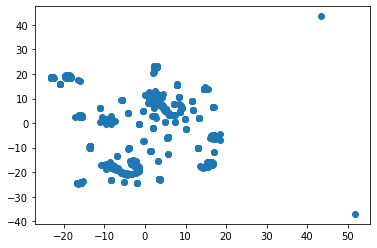

In [55]:
#Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
plt.scatter(tdf["x"], tdf["y"])
plt.show

### There seems to be a few potential clusters. Using k-Means will help to explore this potential clustering further.

## Custer Analysis with k-Means

In [57]:
#Create an elbow plot to identify the best number of clusters. 
# Use a for-loop to determine the inertia for each k between 1 through 10. 
#Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

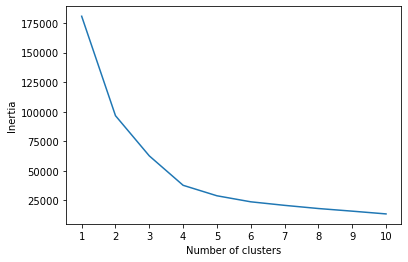

In [58]:
#create an empty list for inertia values
inertia = []

#list of values for k
k = [1,2,3,4,5,6,7,8,9,10]


# for loop to test each value in the list of potential k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tdf)
    inertia.append(km.inertia_)

# use the results above to create a new dataframe to be used to plot an elbow curve
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

#plot the elbow curve
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Based on the elbow curve, one could make the case for both 3 and 4 as appropriate k values. For this project, I will chose 4.

In [60]:
# k value of 4 to cluster the data
kmeans = KMeans(n_clusters=4)
kmeans.fit(tdf)
y_kmeans = kmeans.predict(tdf)

<function matplotlib.pyplot.show(close=None, block=None)>

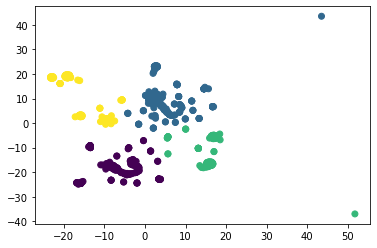

In [61]:
# new scatter plot that uses color to show the k-Means clusters
plt.scatter(tdf["x"], tdf["y"], c=y_kmeans)
plt.show

### Looking at the plot, it seems that the cryptocurrencies can be clustered into 4 clusters using k-Means. However, these clusters do not provide meaningful insight into the desirability of investing in specific cryptocurrencies. Other steps or different methods would be needed.